# Football Database 
Football and Betting Statistics of the European Top5 Leagues

**D2TEC – Tecnologias de Big Data**<br />
Especialização em Ciência de Dados - IFSP Campinas

Alunos
- Daniel Vargas Shimamoto
- Diego Machado de Assis

# 0. Informações Gerais

## 0.1. Sobre os dados

Este é um conjunto de dados referentes às cinco principais ligas de futebol da Europa entre os anos de 2014-2020. A saber: *Premiere League* (Inglaterra), *Serie A* (Itália), *Bundesliga* (Alemanha), *La Liga* (Espanha) e *Ligue 1* (França).

Os dados estão dividos em 7 tabelas e foram coletados das fontes https://understat.com/ e https://www.football-data.co.uk/

O *dataset* completo utilizado foi obtido da seguinte fonte: https://www.kaggle.com/technika148/football-database 

## 0.2. Descrição das tabelas

### league
> Cinco principais ligas de futebol da Europa

- leagueID (INT, PK): Identificador único da liga
- name (TEXT): Nome da liga
- understatNotation (TEXT): Nome da liga (na notação do  [understat](https://understat.com/))

### team
> Todos times que participaram em uma das ligas de futebol no período de tempo considerado

- teamID (INT, PK): Identificador do time
- name (TEXT): Nome do time

### player
> Jogadores que atuaram em uma das ligas de futebol no período de tempo considerado

- playerID (INT, PK): Identificador único do jogador
- name (TEXT): Nome do Jogador

### game
> Todos jogos de uma das ligas de futebol no período de tempo considerado

- gameID (INT, PK): Identificador único do jogo
- leagueID (INT, FK): Identificador da liga
- season (INT): Temporada
- date (DATETIME): Data do jogo
- homeTeamID (INT, FK): Identificador do time mandante
- awayTeamID (INT, FK): Identificador do time visitante
- homeGoals (INT): Gols marcados pelo time mandante no jogo
- awayGoals (INT): Gols marcados pelo time visitante no jogo
- homeProbability (FLOAT): Probabilidade estimada de vitória do time mandante
- drawProbability (FLOAT): Probabilidade estimada de empate
- awayProbability (FLOAT): Probabilidade estimada de vitória do time visitante
- homeGoalsHalfTime (INT): Gols marcados pelo time mandante no primeiro tempo
- awayGoalsHalfTime (INT): Gols marcados pelo time visitante no primeiro tempo
- B365H (FLOAT) 
- B365D (FLOAT) 
- B365A (FLOAT) 
- BWH (FLOAT) 
- BWD (FLOAT) 
- BWA (FLOAT) 
- IWH (FLOAT) 
- IWD (FLOAT) 
- IWA (FLOAT) 
- PSH (FLOAT) 
- PSD (FLOAT) 
- PSA (FLOAT) 
- WHH (FLOAT) 
- WHD (FLOAT) 
- WHA (FLOAT) 
- VCH (FLOAT) 
- VCD (FLOAT) 
- VCA (FLOAT) 
- PSCH (FLOAT) 
- PSCD (FLOAT) 
- PSCA (FLOAT) 

Os campos $\{B365, VW, IW, PS, WH, VC, PSC\} \times \{H, D, A\}$ são relacionados a valores em locais de apostas para o time da casa (H), visitante (A) ou empate (D). Estes valores não foram utilizados em análises neste trabalho.

### teamstat
> Estatísticas de jogos por time em uma das ligas de futebol no período de tempo considerado

- gameID (INT, PK, FK): Identificador do jogo
- teamID (INT, PK, FK): Identificador do time
- season (INT): Temporada
- date (DATETIME): Data do jogo
- location (CHAR): Jogo dentro ou fora de casa
- goals (INT): Gols marcados
- XGoals (FLOAT): Expectativa de gols
- shots (INT): Chutes
- shotsOnTarget (INT): Chutes no gol
- deep (INT): Passes realizados a uma distância estimada de 20 jardas do gol (exceto cruzamento)
- ppda (FLOAT): Passes permitidos por ação defensiva no meio-campo adversário
- fouls (INT): Faltas cometidas
- corners (INT): Escanteios
- yellowCards (INT): Cartões amarelos
- redCards (INT): Cartões vermelhos
- result (CHAR): Resultado (Vitória, Derrota ou Empate)

### appearence
> Cada participação que um jogador fez em um dos jogos das ligas de futebol no período de tempo considerado

- gameID (INT, PK, FK): Identificador do jogo
- playerID (INT, PK, FK): Identificador do jogador
- goals (INT): Gols marcados
- ownGoals (INT): Gols contras
- shots (INT): Chutes
- xGoals (FLOAT): Gols esperados
- xGoalsChain (FLOAT): Gols esperados de cada posse em que o jogador esteve envolvido
- xGoalsBuildup (FLOAT): `XGoalsChain` sem passes chaves e chutes
- assists (INT): Assistências
- keyPasses (INT): Passes chaves
- xAssists (FLOAT): Assistencias esperadas
- position (TEXT): Possição
- positionOrder (INT): Posição (Númerica)
- yellowCard (INT): Cartões amarelos
- redCard (INT): Cartões vermelhos
- time (INT): Tempo jogado
- substituteIn (INT): Aparição do jogador que entrou
- substituteOut (INT): Aparição do jogador que saiu
- leagueID (INT, FK): Identificador da liga
 
### shot
> Todos os chutes dados em um dos jogos das ligas de futebol no período de tempo considerado

- gameID (INT, FK): Identificador do jogo
- shooterID (INT, FK): Identificador do jogador que realizou o chute
- assisterID (INT, FK): Identificador do jogador que deu assistência para o chute
- minute (INT): Minuto do jogo
- situation (TEXT): Situação de jogo
- lastAction (TEXT): Ultima ação antes do chute
- shotType (TEXT): Tipo de chute
- shotResult (TEXT): Resultado do chute
- xGoal (FLOAT): Expectativa de Gol
- positionX (FLOAT): Posição onde o chute foi feito (lado longo do campo)
- positionY (FLOAT): Posição onde o chute foi feito (lado curto do campo)

## 0.3. Diagrama Entidade-Relacionamento

![](../assets/FootballDatabase.model.png)

# 1. Preparação para análise

## 1.1. Configuração da base de dados

In [1]:
DB_CONFIG = {
    'user': 'd2tec_readonly',
    'password': 'L7pH!yVpXCXzy#p0FDiCg0h2',
    'host': 'd2tec-trabalho1-football-database.cfwkca29qevn.us-east-1.rds.amazonaws.com',
    'database': 'football',
    'raise_on_warnings': True
}

## 1.2. Instalação das dependências

In [2]:
!pip install mysql-connector-python

## 1.3. Importações

In [3]:
# Mysql
import mysql.connector
from mysql.connector import errorcode

# Vetores e matrizes no python
import pandas as pd
import numpy as np

# Visualização
import seaborn as sns
import matplotlib.pyplot as plt

## 1.4. Configurações adicionais

In [4]:
# Estilo dos gráficos
sns.set_theme(style='dark', rc={'axes.titlesize': 18, 'axes.labelsize': 14, 'axes.grid.axis': 'y'})

## 1.5. Funções auxiliares

### 1.5.1. Conexão com Mysql

In [5]:
def mysql_connect(config):

    try:
        cnx = mysql.connector.connect(**config)
        return cnx

    except mysql.connector.Error as err:
        if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
            print(f'[CONNERROR] Invalid credentials: {err}')
            
        elif err.errno == errorcode.ER_BAD_DB_ERROR:
            print(f'[CONNERROR] Database does not exist: {err}')
            
        else:
            print(f'[CONNERROR] {err}')
            
        return None

### 1.5.2. Encerramento de conexão com Mysql

In [6]:
def mysql_close_connection(cnx):
    
    try:
        cnx.close()
        
    except mysql.connector.Error as err:
        print(f'[CLOSEERROR] Failed closing connection to mysql: {err}')
        raise

### 1.5.3. Execução de *query*

In [7]:
def exec_query(query):
    
    cnx = mysql_connect(DB_CONFIG)
    cursor = cnx.cursor()
    
    cursor.execute(query)
    
    df = pd.DataFrame(cursor.fetchall(), columns=cursor.column_names)
    
    mysql_close_connection(cnx)
    return df

# 2. Análises 

## 2.1. Os dez times com maior percentual de vitórias

### Objetivo
- Encontrar os times que tiveram mais vitórias entre os anos de 2014 até 2020

### Tabelas usadas
- teamstat
- team

### Métodos usados
- **Agregação**: SUM, COUNT, ROUND, CASE
- **Consultas**: Subquery, Left Join, Group By, Order By, Limit

In [8]:
query_1 = '''
SELECT
    name as Team,
    sum(wins) as Wins,
    count(wins) as Games,
    ROUND(100 * SUM(wins)/COUNT(wins), 2) as Win_rate
FROM (
    SELECT 
        CASE 
            WHEN result = 'W' THEN 1 ELSE 0 
            END AS wins,
        name
    FROM teamstat
    LEFT JOIN team ON teamstat.teamID = team.teamID
) AS G
GROUP BY Team
ORDER BY Win_rate DESC
LIMIT 10
'''

result_1 = exec_query(query_1)
result_1

,Team,Wins,Games,Win_rate
0,Bayern Munich,179,238,75.21
1,Paris Saint Germain,187,255,73.33
2,Juventus,191,266,71.80
3,Barcelona,190,266,71.43
4,Manchester City,183,266,68.80
5,Real Madrid,181,266,68.05
6,Atletico Madrid,163,266,61.28
7,Napoli,163,266,61.28
8,Liverpool,159,266,59.77
9,Roma,150,266,56.39


## 2.1. Confrontos em que o time visitante tem a maior probabilidade estimada média de ganhar

### Objetivo
- Encontrar os confrontos em que os times visitantes tiveram a maior probabilidade estimada média de vitórias entre os times das principais ligas européias entre os anos de 2014 e 2020

### Tabelas usadas
- game
- team

### Métodos usados
- **Agregação**: AVG
- **Consultas**: Subquery, Left Join, Group By, Order By, Limit

In [9]:
query_2 = '''
SELECT 
    A.name as homeTeam,
    team.name as awayTeam,
    AVG(homeProbability) as avg_homeProbability,
    AVG(drawProbability) as avg_drawProbability,
    AVG(awayProbability) as avg_awayProbability
FROM (
    SELECT
        name,
        awayTeamID,
        homeProbability,
        drawProbability,
        awayProbability
    FROM game
    LEFT JOIN team ON game.homeTeamID = team.teamID
) A
LEFT JOIN team ON A.awayTeamID = team.teamID
GROUP BY
    A.name,
    team.name
ORDER BY avg_awayProbability DESC
LIMIT 20
'''

result_2 = exec_query(query_2)
result_2

,homeTeam,awayTeam,avg_homeProbability,avg_drawProbability,avg_awayProbability
0,Cordoba,Barcelona,0.00020,0.00120,0.99860
1,Lecce,Atalanta,0.00050,0.00170,0.99780
2,Spezia,Inter,0.00040,0.02240,0.97720
3,Elche,Barcelona,0.00280,0.02595,0.97125
4,Nancy,Monaco,0.00350,0.02670,0.96980
5,Pescara,Bologna,0.00380,0.03350,0.96270
6,Cardiff,Manchester City,0.00290,0.03520,0.96190
7,Paderborn,Bayern Munich,0.00595,0.03300,0.96105
8,Benevento,Atalanta,0.01265,0.04405,0.94330
9,Fortuna Duesseldorf,Bayern Munich,0.00995,0.04830,0.94175


## 2.3. Jogadores que fizeram mais gols e a taxa de gols por chute

### Objetivo
- Encontrar os jogadores que fizeram mais gols entre os anos de 2014-2020 dentro das 5 principais ligas de futebol européia

### Tabelas usadas
- shot
- player

### Métodos usados
- **Agregação**: COUNT, SUM, CAST, CASE
- **Consultas**: Subquery, Left Join, Group By, Order By, Limit

In [10]:
query_3 = '''
SELECT
    A.*,
    100 * CAST(goals AS FLOAT) / CAST(shots AS FLOAT) as goal_rate
FROM(
    SELECT 
        player.name as player,
        COUNT(shotResult) as shots,
        SUM(
            CASE WHEN shotResult = 'Goal' THEN 1
                ELSE 0 
            END
        ) AS goals
    FROM shot
    LEFT JOIN player on shot.shooterID = player.playerID
    GROUP BY player.name
) A
ORDER BY goals DESC
LIMIT 10
'''
result_3 = exec_query(query_3)
result_3

,player,shots,goals,goal_rate
0,Lionel Messi,1392,272,19.540230
1,Cristiano Ronaldo,1463,241,16.473001
2,Robert Lewandowski,974,207,21.252567
3,Luis Suárez,811,176,21.701603
4,Harry Kane,889,163,18.335208
5,Pierre-Emerick Aubameyang,698,156,22.349570
6,Sergio Agüero,758,140,18.469657
7,Antoine Griezmann,684,138,20.175439
8,Ciro Immobile,725,133,18.344828
9,Edinson Cavani,560,132,23.571429


### Gráfico de barras e linha

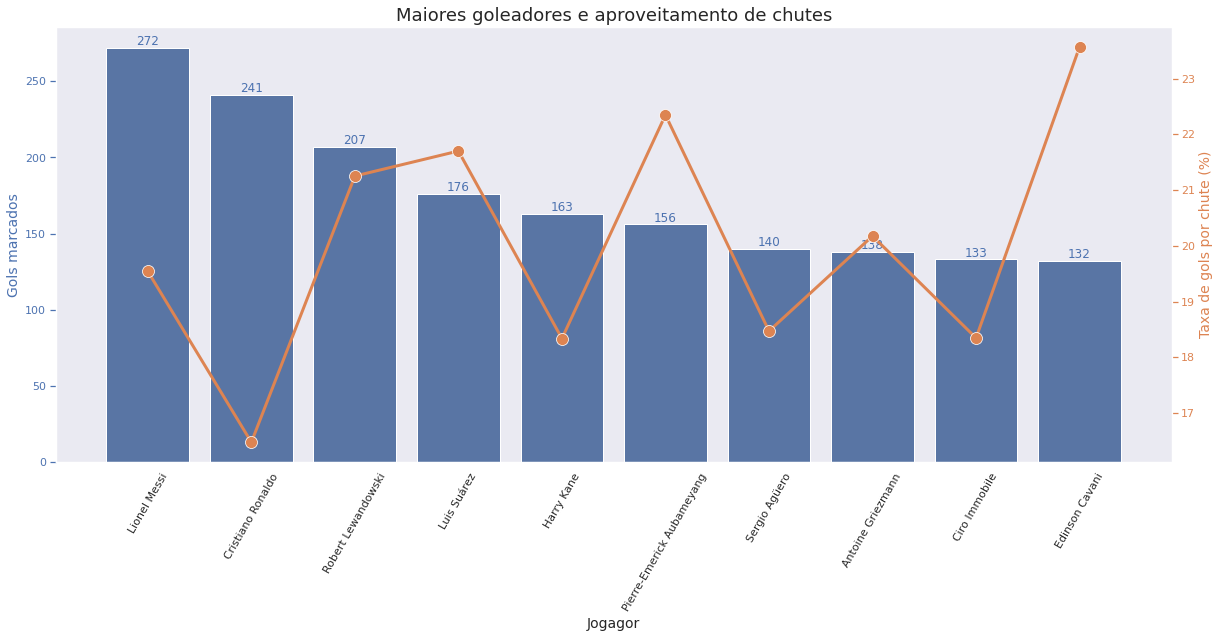

In [11]:
goals_color = sns.color_palette()[0]
rate_color = sns.color_palette()[1]

plt.figure(figsize=(20,8))

ax_goals = sns.barplot(data=result_3, x='player', y='goals', color=goals_color)
ax_goals.set_ylabel("Gols marcados", color=goals_color)
ax_goals.tick_params(axis='y', color=goals_color, labelcolor=goals_color)
ax_goals.bar_label(ax_goals.containers[0], color=goals_color)

ax_rate = ax_goals.twinx()
sns.lineplot(ax=ax_rate, data=result_3, x='player', y='goal_rate', color=rate_color, linewidth=3, marker='o', markersize=12)
ax_rate.set_ylabel("Taxa de gols por chute (%)", color=rate_color)
ax_rate.tick_params(axis='y', color=rate_color, labelcolor=rate_color)

ax_goals.set(title="Maiores goleadores e aproveitamento de chutes", xlabel='Jogagor')
ax_goals.tick_params(axis='x', rotation=60)
plt.show()

## 2.4. Jogadores com maior participação em gols (Assistencia + Gol)

### Objetivo
- Encontrar os jogadores que mais participaram de gols (assitencia + gol) entre os anos de 2014-2020 dentro das 5 principais ligas de futebol européia

### Tabelas usadas
- shot
- player

### Métodos usados
- **Agregação**: SUM, CASE
- **Consultas**: CTE, Left Join, Where, Order By, Limit

In [12]:
query_4 = '''
WITH 
t_goals AS(
    SELECT
        player.name as player,
        SUM(
            CASE WHEN shotResult = 'Goal' THEN 1 
                ELSE 0 
            END
        ) AS goals
    FROM shot
    LEFT JOIN player on shot.shooterID = player.playerID
    GROUP BY player.name
),

t_assistence AS(
    SELECT
        player.name as assist_player,
        SUM(
            CASE WHEN shotResult = 'Goal' THEN 1 
                ELSE 0 
            END
        ) AS assistence
    FROM shot
    LEFT JOIN player on shot.assisterID = player.playerID
    GROUP BY player.name
)

SELECT
    t_assistence.assist_player player,
    t_assistence.assistence,
    t_goals.goals,
    t_assistence.assistence + t_goals.goals as total_participation
FROM t_assistence
LEFT JOIN t_goals on t_assistence.assist_player = t_goals.player
WHERE player <> 'None'
ORDER BY total_participation DESC
LIMIT 10
'''

result_4 = exec_query(query_4)
result_4

,player,assistence,goals,total_participation
0,Lionel Messi,97,272,369
1,Luis Suárez,146,176,322
2,Cristiano Ronaldo,54,241,295
3,Robert Lewandowski,32,207,239
4,Harry Kane,34,163,197
5,Neymar,61,128,189
6,Pierre-Emerick Aubameyang,31,156,187
7,Mohamed Salah,53,130,183
8,Antoine Griezmann,42,138,180
9,Karim Benzema,55,123,178


## 2.5. Times que mais ganharam como visitantes

### Objetivo
- Encontrar os times que mais venceram como visitante entre os anos de 2014-2020 dentro das 5 principais ligas de futebol européia

### Tabelas usadas
- game
- team

### Métodos usados
- **Agregação**: CASE
- **Consultas**: CTE, Left Join, Where, Group By, Order By, Limit

In [13]:
query_5 = '''
WITH t_win as (
    SELECT
        name,
        CASE 
            WHEN homeGoals > awayGoals THEN 'homeWin'
            WHEN homeGoals < awayGoals THEN 'awayWin'
            WHEN homeGoals = awayGoals THEN 'draw'
            ELSE 'not_a_result'
        END as Wining
    FROM game
    LEFT JOIN team on game.awayTeamID = team.teamID
)

SELECT
    name,
    count(Wining) as awayVictoryTotal
FROM t_win
WHERE Wining = 'awayWin'
GROUP BY name
ORDER BY awayVictoryTotal DESC
LIMIT 20
'''
result_5 = exec_query(query_5)
result_5

,name,awayVictoryTotal
0,Barcelona,85
1,Paris Saint Germain,85
2,Bayern Munich,84
3,Manchester City,84
4,Real Madrid,82
5,Juventus,80
6,Napoli,74
7,Liverpool,72
8,Chelsea,69
9,Atletico Madrid,66


## 2.6. Time com mais gols em uma única temporada

### Objetivo
- Encontrar os times que mais fizeram gols em uma única temporada entre os anos de 2014-2020 dentro das 5 principais ligas de futebol européia

### Tabelas usadas
- teamstat
- team

### Métodos usados
- **Agregação**: SUM, COUNT, CAST 
- **Consultas**: Left Join, Group By, Order By, Limit

In [14]:
query_6 = '''
SELECT
    team.name AS team,
    season,
    SUM(goals) AS goals,
    COUNT(*) AS games,
    CAST(SUM(goals) AS FLOAT)/CAST(count(*) AS FLOAT) AS goals_per_game
FROM teamstat
LEFT JOIN team ON teamstat.teamID = team.teamID
GROUP BY
    team,
    season
ORDER BY goals DESC
LIMIT 20
'''
result_6 = exec_query(query_6)
result_6

,team,season,goals,games,goals_per_game
0,Real Madrid,2014,118,38,3.105263
1,Barcelona,2016,116,38,3.052632
2,Barcelona,2015,112,38,2.947368
3,Barcelona,2014,110,38,2.894737
4,Real Madrid,2015,110,38,2.894737
5,Paris Saint Germain,2017,108,38,2.842105
6,Monaco,2016,107,38,2.815789
7,Manchester City,2017,106,38,2.789474
8,Real Madrid,2016,106,38,2.789474
9,Paris Saint Germain,2018,105,38,2.763158


## 2.7. Jogadores que receberam mais cartões (Amarelo + Vermelho)

### Objetivo
- Encontrar os jogadores que mais foram penalizados com cartões (Amarelo + Vermelho) entre os anos de 2014-2020 dentro das 5 principais ligas de futebol européia

### Tabelas usadas
- appearance
- player

### Métodos usados
- **Agregação**: SUM
- **Consultas**: Left Join, Group By, Order By, Limit

In [15]:
query_7 = '''
SELECT
    name,
    sum(redCard) as totalRedCard,
    sum(yellowCard) as totalYellowCard,
    sum(redCard) + sum(yellowCard) as totalCard
FROM appearance
LEFT JOIN player ON appearance.playerID = player.playerID
GROUP BY name
ORDER BY totalCard DESC
LIMIT 10
'''

result_7 = exec_query(query_7)
result_7

,name,totalRedCard,totalYellowCard,totalCard
0,Danilo,6,83,89
1,Raúl García,2,81,83
2,Dani García,2,80,82
3,Álvaro González,4,74,78
4,Damián Suárez,4,71,75
5,Felipe,5,67,72
6,Recio,1,69,70
7,Víctor Sánchez,3,65,68
8,Rubén Pérez,1,66,67
9,Tomás Rincón,1,66,67


## 2.8. Resultado final dos jogo para os times que perderam o primeiro tempo

### Objetivo
- Descobrir a quantidade de resultados que são revertidos nos jogos em que o time está perdendo até o final do primeiro tempo durante os anos de 2014-2020 dentro das 5 principais ligas de futebol européia

### Tabelas usadas
- game

### Métodos usados
- **Agregação**: COUNT, CASE 
- **Consultas**: Subquery, Union, Group By, Where

In [16]:
query_8 = '''
SELECT
    result,
    COUNT(team) as games
FROM (
    (
        SELECT
            homeTeamID as team,
            homeGoalsHalfTime,
            awayGoalsHalfTime,
            homeGoals,
            awayGoals,
            CASE
                WHEN homeGoals < awayGoals THEN 'lose'
                WHEN homeGoals = awayGoals THEN 'draw'
                WHEN homeGoals > awayGoals THEN 'win'
            END AS result
        FROM game
        WHERE homeGoalsHalfTime < awayGoalsHalfTime
    )
    UNION
    (
        SELECT
            awayTeamID as team,
            homeGoalsHalfTime,
            awayGoalsHalfTime,
            homeGoals,
            awayGoals,
            CASE
                WHEN homeGoals > awayGoals THEN 'lose'
                WHEN homeGoals = awayGoals THEN 'draw'
                WHEN homeGoals < awayGoals THEN 'win'
            END AS result
        FROM game
        WHERE homeGoalsHalfTime > awayGoalsHalfTime
    )
) as r
GROUP BY result
'''

result_8 = exec_query(query_8)
result_8

,result,games
0,draw,650
1,lose,3311
2,win,394


### Gráfico de pizza

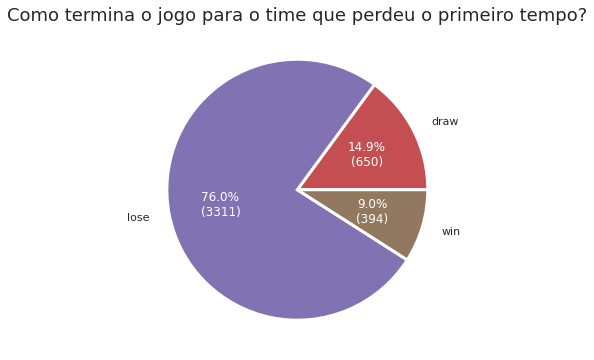

In [17]:
fig, ax = plt.subplots(figsize=(18, 6), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = round(pct/100 * np.sum(allvals))
    return f"{pct:.1f}%\n({absolute})"

wedges, texts, autotexts = ax.pie(result_8.games, autopct=lambda pct: func(pct, result_8.games), textprops=dict(color="w"))

ax.pie(result_8.games, labels=result_8.result, labeldistance=1.15, wedgeprops={'linewidth': 3, 'edgecolor': 'white'})
plt.setp(autotexts, size=12)

ax.set_title("Como termina o jogo para o time que perdeu o primeiro tempo?")
plt.show()

## 2.9. Artilheiros de cada liga por temporada

### Objetivo
- Encontrar os jogadores que marcaram mais gols durante apenas uma temporada entre os anos de 2014-2020 em cada uma das 5 principais ligas de futebol européia

### Tabelas usadas
- appearance
- game
- player
- league

### Métodos usados
- **Agregação**: SUM, MAX, GROUP_CONCAT
- **Consultas**: CTE, Inner Join, Left Join, Group By, Order By

In [18]:
query_9 = '''
WITH
t_goals AS (
    SELECT
        league.name AS league,
        game.season AS season,
        player.name AS player,
        SUM(appearance.goals) AS goals
    FROM appearance
    LEFT JOIN game ON game.gameID = appearance.gameID
    LEFT JOIN player ON player.playerID = appearance.playerID
    LEFT JOIN league ON league.leagueID = appearance.leagueID
    GROUP BY
        league.name,
        game.season,
        player.name
    ),

t_play AS (
    SELECT
        t_goals.league,
        t_goals.season,
        t_goals.player,
        t_goals.goals
    FROM t_goals
    INNER JOIN (
        SELECT
            league,
            season,
            MAX(goals) max_goals
        FROM t_goals
        GROUP BY league, season
    ) t ON
        t_goals.league = t.league AND
        t_goals.season = t.season AND
        t_goals.goals = t.max_goals
)

SELECT
    league,
    season,
    GROUP_CONCAT(player) AS player,
    goals
FROM t_play
GROUP BY league, season, goals 
ORDER BY league, season
'''

result_9 = exec_query(query_9)
result_9

,league,season,player,goals
0,Bundesliga,2014,Alexander Meier,19
1,Bundesliga,2015,Robert Lewandowski,30
2,Bundesliga,2016,Pierre-Emerick Aubameyang,31
3,Bundesliga,2017,Robert Lewandowski,29
4,Bundesliga,2018,Robert Lewandowski,22
5,Bundesliga,2019,Robert Lewandowski,34
6,Bundesliga,2020,Robert Lewandowski,41
7,La Liga,2014,Cristiano Ronaldo,48
8,La Liga,2015,Luis Suárez,40
9,La Liga,2016,Lionel Messi,37


### Gráfico de pontos com tamanho variável

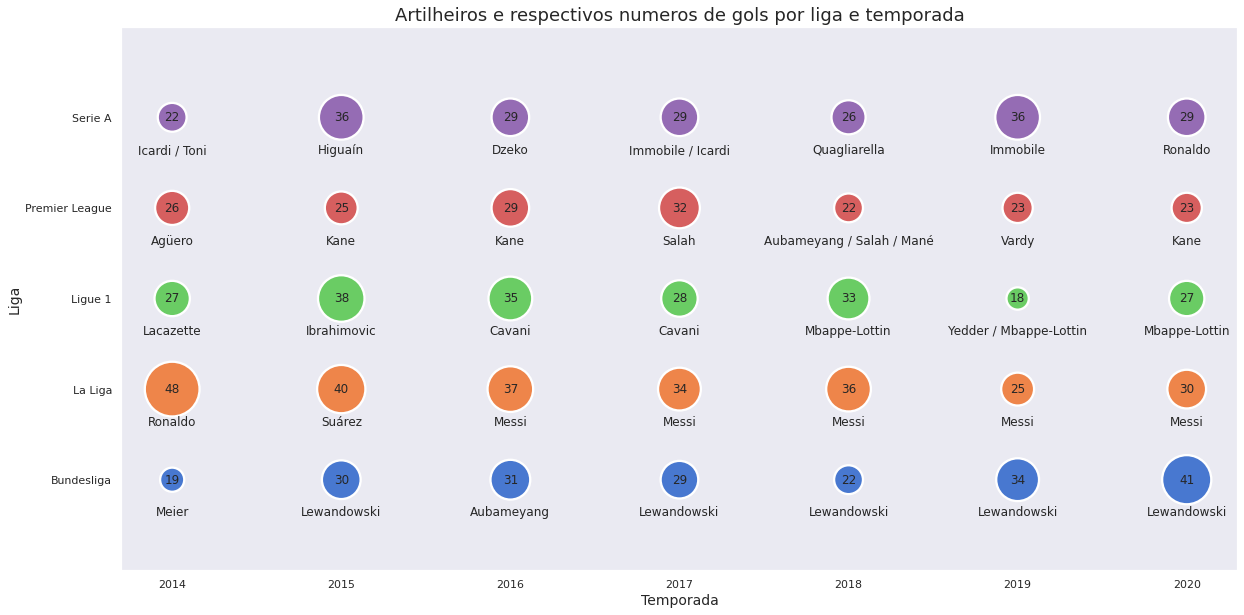

In [19]:
plt.figure(figsize=(20,10))

result_9["goals"] = pd.to_numeric(result_9["goals"], downcast='integer')
league_position = { league:pos for pos, league in enumerate(result_9.league.unique()) }

ax = sns.scatterplot(
    data=result_9,
    x='season',
    y='league',
    hue='league',
    size='goals',
    sizes=(500, 3000),
    palette='muted',
    legend=False
)

for _, row in result_9.iterrows():
    plt.text(
        x=row.season,
        y=row.league,
        s=row.goals,
        ha='center',
        va='center'
    )
    plt.text(
        x=row.season,
        y=league_position.get(row.league) - 0.4,
        s=' / '.join(map(lambda x: x.split(" ")[-1], row.player.split(","))),
        ha='center'
    )

ax.set(title='Artilheiros e respectivos numeros de gols por liga e temporada', xlabel='Temporada', ylabel='Liga')
plt.ylim(-1, 5)
plt.show()

## 2.10. Maiores azarões a vencer

### Objetivo
- Encontrar os times que tinham menores probabilidades de vitórias e ganharam os confrontos durante os anos de 2014-2020 nas 5 principais ligas de futebol européia

### Tabelas usadas
- game
- league
- team
- teamstat

### Métodos usados
- **Agregação**: CASE
- **Consultas**: Subquery, Left Join, Where, Order By, Limit

In [20]:
query_10 = '''
SELECT
    league,
    season,
    CASE
        WHEN homeProbability < awayProbability THEN homeTeam
        WHEN homeProbability > awayProbability THEN awayTeam
    END as winer,
    CASE
        WHEN homeProbability > awayProbability THEN homeTeam
        WHEN homeProbability < awayProbability THEN awayTeam
    END as loser,
    CASE
        WHEN homeProbability < awayProbability THEN homeProbability
        WHEN homeProbability > awayProbability THEN awayProbability
    END as probability
FROM (
    SELECT
        league.name as league,
        game.season,
        homeProbability,
        awayProbability,
        homeTeam.name as homeTeam,
        awayTeam.name as awayTeam
    FROM game
    LEFT JOIN league ON league.leagueID = game.leagueID
    LEFT JOIN team as homeTeam ON homeTeam.teamID = game.homeTeamID
    LEFT JOIN team as awayTeam ON awayTeam.teamID = game.awayTeamID
    LEFT JOIN teamstat ON game.gameID = teamstat.gameID
    WHERE
        (homeProbability < awayProbability AND teamstat.teamID = game.homeTeamID and result = 'W') OR
        (homeProbability > awayProbability AND teamstat.teamID = game.awayTeamID and result = 'W')
) as p
ORDER BY probability
LIMIT 20
'''

result_10 = exec_query(query_10)
result_10

,league,season,winer,loser,probability
0,Ligue 1,2020,Nice,Lens,0.0009
1,Ligue 1,2014,SC Bastia,Rennes,0.0033
2,Premier League,2019,Tottenham,Manchester City,0.0069
3,Bundesliga,2015,Schalke 04,Borussia M.Gladbach,0.0076
4,Premier League,2015,Stoke,West Ham,0.0079
5,Premier League,2020,Crystal Palace,Brighton,0.0081
6,Premier League,2020,West Bromwich Albion,Brighton,0.0135
7,La Liga,2020,Eibar,Sevilla,0.0139
8,Premier League,2018,Brighton,Crystal Palace,0.0150
9,La Liga,2014,Malaga,Deportivo La Coruna,0.0155
